<a href="https://colab.research.google.com/github/nnilayy/Unet/blob/main/Arduino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Model Building

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D, AveragePooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

# InceptionV3,
# Xception, 
# VGG16, VGG19, 
# ConvNeXtTiny, ConvNeXtSmall, ConvNeXtBase, ConvNeXtLarge, ConvNeXtXLarge
# EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7
# ResNet50, ResNet101, ResNet152, ResNet50V2, ResNet101V2, ResNet152V2
# MobileNet, MobileNetV2, MobileNetV3Small,
# DenseNet121,DenseNet169,DenseNet20
# NASNetLarge, NASNetMobile, 
# InceptionResNetV2

base_model=tf.keras.applications.VGG16(include_top=True,weights="imagenet",input_shape=(224,224,3),classifier_activation="softmax",)
base_model.trainable = False
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(10,activation='softmax'))
model.summary()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Model


In [ ]:
import tensorflow as tf
from tensorflow import keras
## Helper libraries
import numpy as np
import binascii
import logging

## Check the version of tensorflow (should be 2.8.0)
print(tf.__version__)

## To silent verbose
tf.autograph.set_verbosity(0)
logging.getLogger("tensorflow").setLevel(logging.ERROR)

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# 60,000 training data and 10,000 test data of 28x28 pixel images
print("train_images shape", train_images.shape)
print("train_labels shape", train_labels.shape)
print("test_images shape", test_images.shape)
print("test_labels shape", test_labels.shape)

## Normalize the input image so that each pixel value is between 0 to 1.
train_images = train_images/255.0;
test_images = test_images/255.0;
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)
print('Datasets are normalized')

In [ ]:
## Model definition
model = keras.Sequential([
  keras.layers.InputLayer(input_shape=(28, 28)),
  keras.layers.Reshape(target_shape=(28, 28, 1)),
  keras.layers.Conv2D(filters=6, kernel_size=(3,3), padding='same', activation=tf.nn.relu, name="conv2d_6"), 
  keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
  keras.layers.Flatten(),
  keras.layers.Dense(32, activation=tf.nn.relu, name="dense_32"),
  keras.layers.Dense(10),
  keras.layers.Activation(tf.nn.softmax)])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

In [ ]:
model.fit(x=train_images, y=train_labels, batch_size=128, epochs=30, verbose=1, validation_split=0.1)
test_loss, test_acc = model.evaluate(x=test_images, y=test_labels, verbose=1)
print('Accuracy = %f' % test_acc)

In [ ]:
model.save("/content/model.h5")

## File Size

In [ ]:
import os
def get_file_size(file_path):
  size=os.path.getsize(file_path)
  return size

In [ ]:
def convert_bytes(size,unit=None):
  if unit=="KB":
    return print("File size: "+str(round(size/1024,3))+" Kilobytes")
  elif unit=="MB":
    return print("File size: "+str(round(size/(1024*1024),3))+" Megabytes")
  else:
    return print("File size: "+str(size)+"bytes")

## Model Quantization

In [ ]:
# Model Size Before Model Quantization
convert_bytes(get_file_size(model),"MB")

In [ ]:
model="/content/model.h5"

In [ ]:
import tensorflow as tf
model=tf.keras.models.load_model(model)
converter = tf.lite.TFLiteConverter.from_keras_model(model)

converter.optimizations=[tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
converter.experimental_new_converter = True
tflite_model_name="model.tflite"
tflite_model = converter.convert()
open(tflite_model_name,"wb").write(tflite_model)

In [ ]:
# Model Size After Model Quantization
tflite_mozdel="/content/model.tflite"
convert_bytes(get_file_size(tflite_model),"KB")

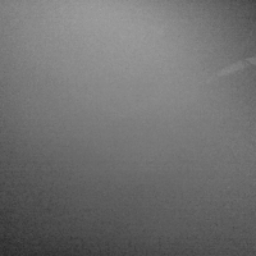

(256, 256, 3)

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
image="/content/GREY126.jpg"
image=cv2.imread(image)
# image=cv2.imread(image,cv2.IMREAD_GRAYSCALE)
image=cv2.resize(image,(256,256))
# image=np.squeeze(image,axis=-1) 
cv2_imshow(image)
image.shape